- Here are the suggested solutions for this assignment. I will use the following rubric to grade. 


    Python Basics-----------20 = 5 + 5 + 10
    Numpy-------------------10 = 5 + 5
    Matplotlib--------------15 = 5 + 10
    Pandas------------------15 = 10 + 5 
    Image Processing--------10 = 1 + 3 + 3 + 3 
    Misc Problems-----------30 = 10 + 10 + 10


- I will give an overal grade rather than giving feedback for each question,which would take forever. 

- I highly suggest to review the solutions first before asking your questions. We can meet each groups to discuss their assignments.

In [76]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
from PIL import ImageFilter

import os
import random

- For each problem, provide your answer in the code cell following the question. You should test out the expected output.
- Please do not delete the actual questions and the name of the functions if exist.

- Feel free to look up online for each question. 


In [1]:
colab = False
if colab:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
else:
    pass

Mounted at /content/drive


- If you are running on Colab, keep no need to switch "False" above.
- Run the code above. That will link your drive to colab server. Then locate the path of the following two zip files from the little folder icon on the upper-left panel.
- Those paths will be different for each user. Do not proceeed untill you successfully run this cell>

In [3]:
if colab:  
  #modify here
    !unzip -u '/content/drive/MyDrive/Intro2DeepLearning/0class-materials/assignments/ch2-python-modules/figures.zip' -d '/content'
    !unzip -u '/content/drive/MyDrive/Intro2DeepLearning/0class-materials/assignments/ch2-python-modules/animals.zip' -d '/content'
    figure_dir = 'content/figures'
    animal_dir = 'content/animals'
else:
    figure_dir = 'figures/'
    animal_dir = 'animals'


Archive:  /content/drive/MyDrive/Intro2DeepLearning/0class-materials/assignments/ch2-python-modules/figures.zip
Archive:  /content/drive/MyDrive/Intro2DeepLearning/0class-materials/assignments/ch2-python-modules/animals.zip


# Python Basics

**Question**: Given two lists, write a Python code that multiplies all entries of the first list with the second one along with index locations. For example; for list1 = [2,4] list2 = [4,9,7], your output must look like

                index1 index2 Multiplication
                0          0         8
                0          1         18
                0          2         14
                1          0         16
                1          1         36
                1          2         28

You may use built-in *enumerate* function and *f-string* formatting for this question. 

In [4]:
#your code comes here
list1 = [2,4]
list2 = [4,9,7]
print(f"index1 index2 Multiplication")
for index1, num1 in enumerate(list1):
    for index2,num2 in enumerate(list2):
        print(f"{index1}          {index2}         {num1*num2}")

index1 index2 Multiplication
0          0         8
0          1         18
0          2         14
1          0         16
1          1         36
1          2         28


**Question** Given a list *num_list* and a number *num*, write a function to return a list of number in *num_list* that are divisible by *num*. For example if num_list=[4,12,28,6,8,0] and num=3, your output list must be [12,6,0]. Use *append* method for lists.

In [5]:
def DivisibleNumbers(num_list,num):
    mylist = []
    for number in num_list:
        if number%num==0:
            mylist.append(number)
    
    return mylist

In [6]:
num_list=[4,12,28,6,8,0]
num = 3
mylist = DivisibleNumbers(num_list,num)
print(mylist)

[12, 6, 0]


**Question**: Write a function to calculate income tax for the given income with the following rule in the table. For example, suppose the taxable income is 45000 the income tax payable is

$$10000\times0 + 10000\times0.1  + 25000\times0.2 = \$6000$$

\begin{array}{ccr}
\hline &Income & Rate(\%)\\
\hline 
&First-10K & 0\% \\
&Next-10K & 10\%\\
&Remaining & 20\%\\
\hline
\end{array}

In [7]:
def IncomeTaxCalculator(income):
    tax_payable = 0

    if income <= 10000:
        tax_payable = 0
        
    elif income <= 20000:
        # no tax on first 10,000
        x = income - 10000
        #10% tax
        tax_payable = x * 0.1
    else:
        # first 10,000
        tax_payable = 0

        # next 10,000 10% tax
        tax_payable = 10000 * 0.1

        # remaining 20%tax
        tax_payable += (income - 20000) * 0.2

    return tax_payable

In [8]:
IncomeTaxCalculator(income=45000)

6000.0

# Numpy

**Question** Given two integers $a$ and $b$ such that $a<b$, write a function that returns all integers between  $a$ and $b$ that are divisible either by 3 or 5. For example, if a=1,b=10 then your ouput must be an array or list looking like [3,5,6,9]

In [12]:
def ReturnDivisibles(a,b):
    ints = np.arange(a,b)
    nums = []
    for x in ints:
        if x%3==0 or x%5==0:
            nums.append(x)
    return nums
            

In [13]:
ReturnDivisibles(a=1,b=10)

[3, 5, 6, 9]

**Question** Given two arrays $x,\hat{x}$, the mean absolute error(mae) is defined as $$mae = \dfrac{1}{n}\sum_{i=1}^{n}\Big|\dfrac{\hat{x}_i-x_i}{x_i}\Big|$$. Write a function to return mae from two arrays. For example, for

            x = np.array([1,4,5])
            xhat = np.array([2,7,3])
            
            returns 
            
            mae=0.716

In [22]:
def mae(x,xhat):
    n = x.shape[0]
    mae = (1/n)*np.sum(np.abs((x-xhat)/x) )
    return mae

In [23]:
x = np.array([1,4,5])
xhat = np.array([2,7,3])
mae(x,xhat)

0.7166666666666666

# Matplotlib

**Question1** Plot $y=xsin(x)$ and $y=xcos(x)$ between $[0,8\pi]$ on the same coordinate plane. Make sure to generate the following graph.


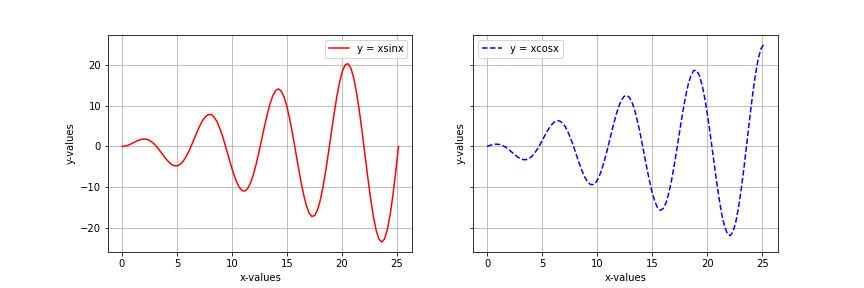

In [29]:
#@title
from IPython.display import Image as Img
Img('figures/dwave.png')

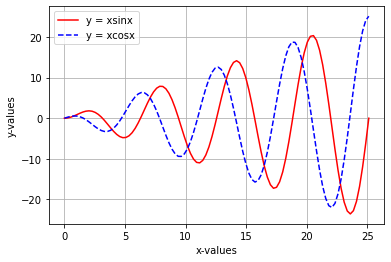

In [24]:
#your code comes here
x = np.linspace(0,8*np.pi,100)
y1 = x*np.sin(x)
y2 = x*np.cos(x)
plt.plot(x,y1,"r-",label= "y = xsinx")
plt.plot(x,y2,"b--",label= "y = xcosx")
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.grid()
plt.legend()
plt.savefig("figures/wave.png")
plt.show()

**Question2** Plot $y=xsin(x)$ and $y=xcos(x)$ between $[0,8\pi]$ on a 1x2 grid using object-oriented Matplotlib approach. Make sure to generate the following graph. Notice that two graphs share the y-axis. Use methods like set_xlabel, set_ylabel, etc.


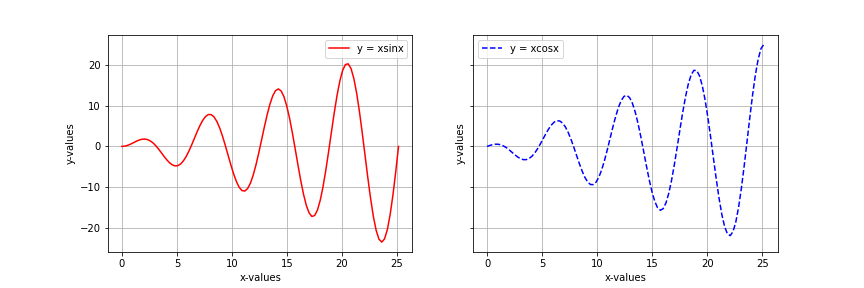

In [ ]:
#@title
from IPython.display import Image as Img
Img('figures/dwave.png')

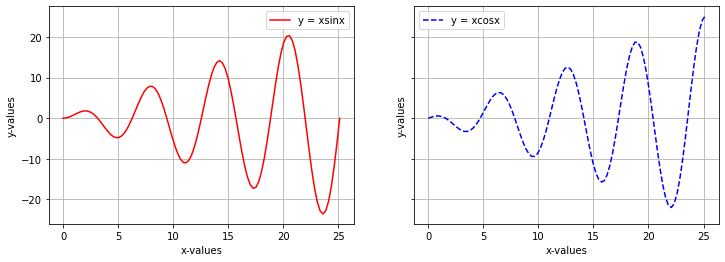

In [26]:
#your code comes here
fig,ax = plt.subplots(1,2,sharey=True,figsize=(12,4))
ax[0].plot(x,y1,"r-")
ax[0].legend(["y = xsinx"])
ax[0].grid("on")
ax[0].set_xlabel("x-values")
ax[0].set_ylabel("y-values")

ax[1].plot(x,y2,'b--')
ax[1].legend(["y = xcosx"])
ax[1].grid("on")
ax[1].set_xlabel("x-values")
ax[1].set_ylabel("y-values")

plt.show()

# Pandas

We will be working on "insurance"d dataset. Here are the columns
    
        age: age of primary user.
        sex: gender.
        bmi: Body Mass Index, ideally between 18.5 and 24.9
        children: number of children/dependents
        smoker: smoking or not
        region: the beneficiary's residential area in the US.
        charges: total premium billed by health insurance


In [31]:
df = pd.read_csv("figures/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Question-1**

**(A)** 
Use *describe* function to answer the following question

1- What is min/max/mean age--> **18/64/39**


2- What is the min/max/mean body-mass-index ---> 15/53/6

In [33]:
#your code comes here
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


**(B)** How many males/females are there? Find the number of people for each region. Use *value_counts* function.

In [34]:
#your code comes here
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [35]:
#your code comes here
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

**(C)**: Display all females older than 63. How many such entries are there? What is their average charge?


**11 entries, 23057**

In [36]:
#code comes here
df_female = df[(df["sex"]=="male") & (df["age"]>63)]
df_female

,age,sex,bmi,children,smoker,region,charges
62,64,male,24.700,1,no,northwest,30166.61817
335,64,male,34.500,0,no,southwest,13822.80300
398,64,male,25.600,2,no,southwest,14988.43200
418,64,male,39.160,1,no,southeast,14418.28040
420,64,male,33.880,0,yes,southeast,46889.26120
534,64,male,40.480,0,no,southeast,13831.11520
635,64,male,38.190,0,no,northeast,14410.93210
752,64,male,37.905,0,no,northwest,14210.53595
1051,64,male,26.410,0,no,northeast,14394.55790
1241,64,male,36.960,2,yes,southeast,49577.66240


In [75]:
#your code comes here
print(df_female["charges"].mean())

23057.882974545457


What is the average charge of smoker males vs non-smoker males?

In [39]:
#your code comes here. Two lines of code
print(df[(df["sex"]=="male") & (df["smoker"]=="yes")]["charges"].mean())
print(df[(df["sex"]=="male") & (df["smoker"]=="no")]["charges"].mean())

33042.00597528303
8087.204731276595


**(E)** Use seaborn to plot the males/females count as histogram plot. Use shrink=0.6 option. Obtain the following graphs.

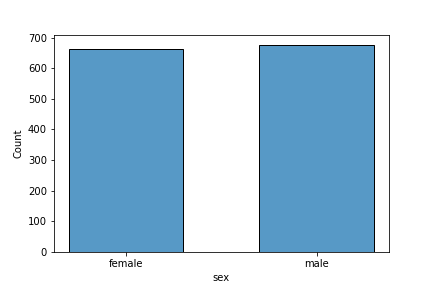

In [ ]:
#@title
from IPython.display import Image as Img
Img('figures/inssex.png')

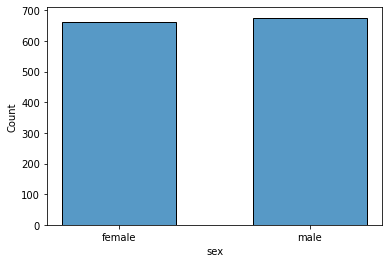

In [40]:
#your code comes here for gender
sns.histplot(x=df["sex"],shrink=0.6)
plt.show()

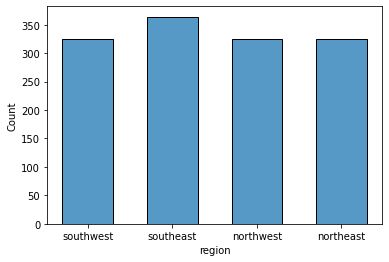

In [41]:
#your code comes here for region
sns.histplot(x=df["region"],shrink=0.6)
plt.show()

**(F)** Learn how to use *pairplot* function of Seaborn. Use this function to create a scatter plot of age and bmi vs charges. Use smoker column as a *hue* variable. How do you interpret this scatter plot? Your graph should like like

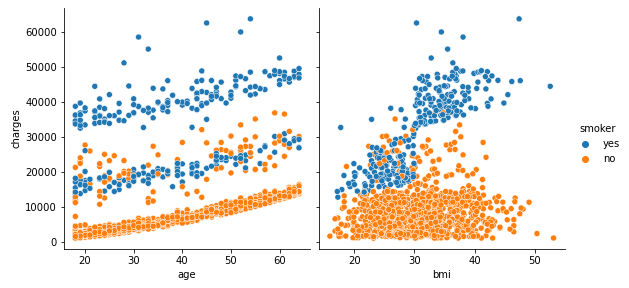

In [ ]:
#@title
from IPython.display import Image as Img
Img('figures/smoke.png')

- Clearly, smokers have significantly higher charges. Note that we revealed this fact with just a single line of code. When you have multi-column data, always think about how to take advantage of hue variable.

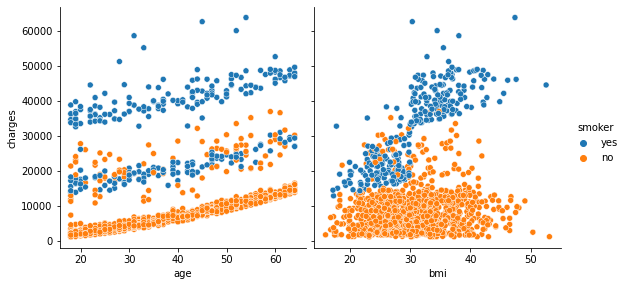

In [43]:
#your code comes here
sns.pairplot(df, x_vars = ['age','bmi'], y_vars='charges',hue='smoker',height = 4, aspect = 1, kind = 'scatter')
plt.show()

**Question-2**

- It is possible to download your own Netflix data. Click [here](https://www.netflix.com/account/getmyinfo) to submit a request to download your data. You can actually access your Amazon and Facebook data similarly. Especially Amazon data can scare the hell out of you!
- When you download and unzip Netflix one, it will look like as follows. You will find your Netflix activity in "ViewingActivity" folder. Columns therein are explained in "Cover sheet".




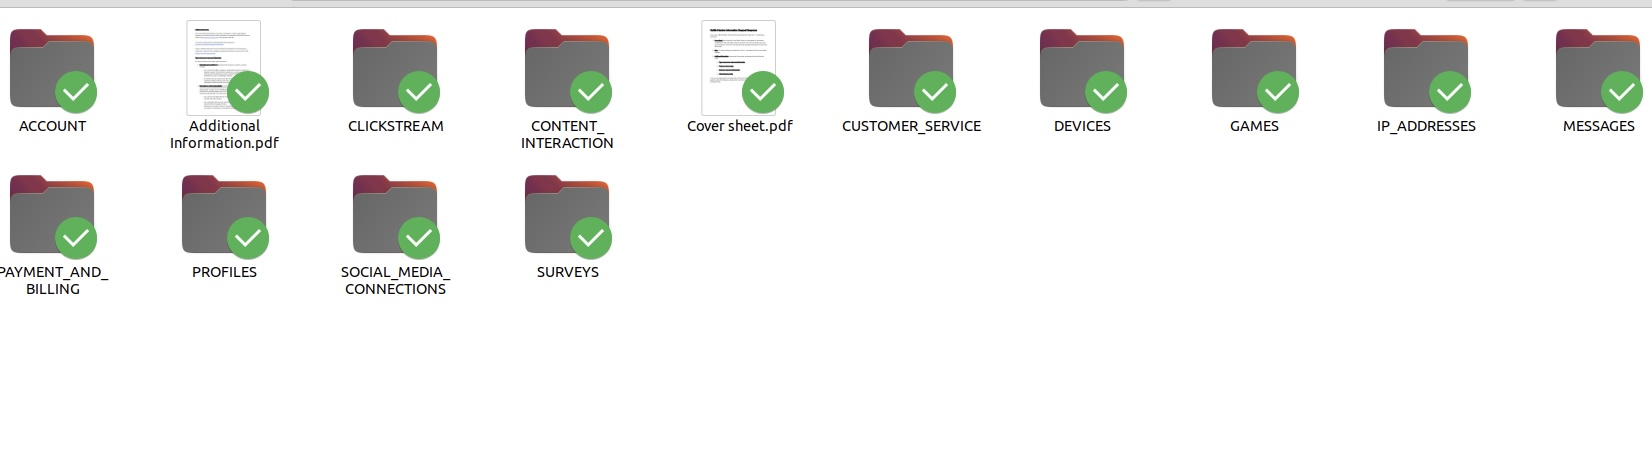

In [ ]:
#@title
from IPython.display import Image as Img
Img('figures/netflix.jpg')

- The one we will use is a small version of it. This is how a real data looks like, messy and nasty.

- You will do some data cleaning. Perform the following steps using appopriate pandas commands.

In [47]:
df = pd.read_csv('figures/ViewingActivity-sample.csv')
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)
1,Charlie,2013-03-20 4:27:45,0:44:31,NaN,Star Trek: Deep Space Nine: Season 5: Blaze of...,NaN,Mac,0:44:31,Not latest view,US (United States)
2,Charlie,2013-03-20 4:05:21,0:22:06,NaN,Star Trek: Deep Space Nine: Season 5: Children...,NaN,Mac,0:44:37,0:44:37,US (United States)
3,Charlie,2013-03-20 0:20:03,0:48:14,NaN,The Invisible War,NaN,Microsoft Xbox 360,0:53:18,0:53:18,US (United States)
4,Charlie,2013-03-20 0:10:31,0:04:51,NaN,The Invisible War,NaN,Mac,0:05:01,Not latest view,US (United States)


1. Drop the following columns; *'Profile Name','Attributes','Supplemental Video Type', 'Device Type','Bookmark', 'Latest Bookmark', 'Country'*


In [48]:
#your code comes here
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 
              'Bookmark', 'Latest Bookmark', 'Country'], axis = 1)
df.head()


,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 4:27:45,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 4:05:21,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-20 0:20:03,0:48:14,The Invisible War
4,2013-03-20 0:10:31,0:04:51,The Invisible War


2. Start time is given in terms of Universal Coordinated Time (UTC) format which is YYYY-MM-DDT hh:mm:ss Convert this to Eastern time zone.


In [50]:
#your code comes here
#Convert Start Time to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'], utc = True)

# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to eastern time
df.index = df.index.tz_convert('US/Eastern')

# reset the index so that Start Time becomes a column again
df = df.reset_index()



#also convert duration to timedelta
df['Duration'] = pd.to_timedelta(df['Duration'])


#display
df.head()

,Start Time,Duration,Title
0,2013-03-20 01:17:53-04:00,0 days 00:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 00:27:45-04:00,0 days 00:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 00:05:21-04:00,0 days 00:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-19 20:20:03-04:00,0 days 00:48:14,The Invisible War
4,2013-03-19 20:10:31-04:00,0 days 00:04:51,The Invisible War



3. Seperate the show name and its episode. In other words, create a new columns names "ShowName" where you have only the name of the show there and 'Title' column will hold only the episode name.

In [51]:
#your code comes here
#ask me if this does not make sense

ShowName = df['Title'].str.split(':').str[0]

#insert ShowName column to the second location
df.insert(1,'ShowName',ShowName)

#display
df.head()




,Start Time,ShowName,Duration,Title
0,2013-03-20 01:17:53-04:00,Star Trek,0 days 00:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 00:27:45-04:00,Star Trek,0 days 00:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 00:05:21-04:00,Star Trek,0 days 00:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-19 20:20:03-04:00,The Invisible War,0 days 00:48:14,The Invisible War
4,2013-03-19 20:10:31-04:00,The Invisible War,0 days 00:04:51,The Invisible War


After these 3 stages, your code will look like as follows;

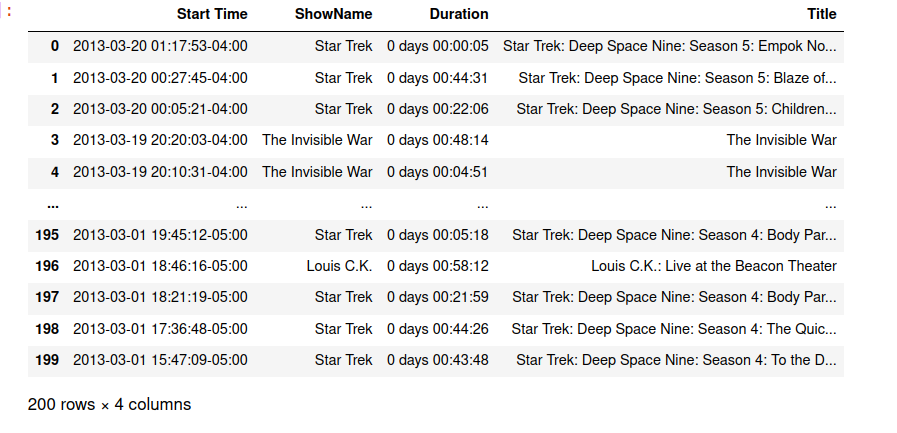

In [ ]:
#@title
from IPython.display import Image as Img
Img('figures/net.png')

- Now you cleaned the data. Answer the followinf question using your cleaned data.

1. How many days does this data cover?
2. How many hours did this person spent wathing Netflix in this data frame?
3. Which shows and movies watched in this time period?
4. How many hours did he spend on each show/movie?
5. Which days did he watch the Office most?
6. Which hours did he watch most? What does the result tell us about his lifestyle in that period?

In [52]:
#1 comes here
df['Start Time'].max()-df['Start Time'].min()

Timedelta('18 days 08:30:44')

In [53]:
#2 comes here
df['Duration'].sum()

Timedelta('2 days 17:23:06')

In [54]:
#3 comes here
show_names  = df['ShowName'].unique()
print(show_names)

['Star Trek' 'The Invisible War' 'The Office (U.S.)' 'Archer' '30 for 30'
 'Buffy the Vampire Slayer' 'Louis C.K.']


In [55]:
#4 comes here
#(1)
show_list = df['ShowName'].unique()
total_hours = {}
for show in show_list:
    time = df['Duration'][df['ShowName']== show].sum()
    total_hours[show] = round(time.seconds/3600,1)

print(total_hours)

{'Star Trek': 20.0, 'The Invisible War': 0.9, 'The Office (U.S.)': 15.0, 'Archer': 3.3, '30 for 30': 0.4, 'Buffy the Vampire Slayer': 0.8, 'Louis C.K.': 1.0}


In [57]:
#5 comes here
# Create a weekday column
df['weekday'] = df['Start Time'].dt.weekday

#get all rows including the Office
df_office = df.loc[df['ShowName']=='The Office (U.S.)']

#first get value counts then sort them
office_by_day = df_office['weekday'].value_counts().sort_index()
print(office_by_day)

0    32
1    17
2    12
3     8
4    20
5    30
6    18
Name: weekday, dtype: int64


In [58]:
#6 comes here
#create day_hours col
df['day_hours'] = df['Start Time'].dt.hour

#get all rows including the Office
df_office = df.loc[df['ShowName']=='The Office (U.S.)']

#first get value counts then sort them
office_by_hours = df_office['day_hours'].value_counts().sort_index()
print(office_by_hours)

0     11
1     17
2      6
3      2
10     3
11     1
12     4
13     6
14     5
15     9
16     9
17     8
18    12
19    16
20     9
21    10
22     4
23     5
Name: day_hours, dtype: int64


# Image Processing

We have a sample image as follows. Answer some questions regarding this image using PIL functions. Use the same cells with the question to enter your answers.

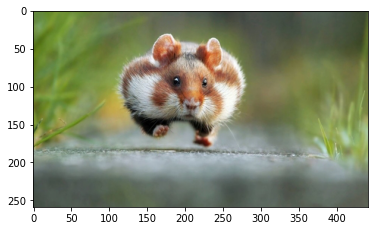

In [60]:
img = Image.open("figures/chipmonk.jpg")
plt.imshow(img)
plt.show()

**Question** What is width and hight of this image?

In [61]:
#code comes here
img.size

(442, 259)

**Question** Rotate this image 45 degrees and display. Why do we have black spots around the rotated image?It should look like

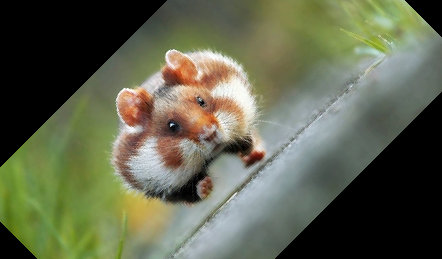

In [ ]:
#@title
from IPython.display import Image as Img
Img('figures/rotate.png')

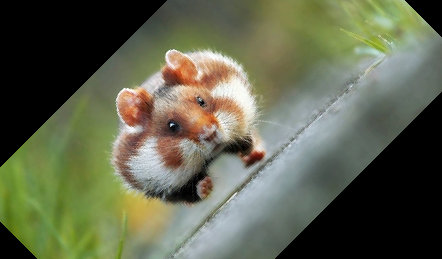

In [63]:
#code comes here
img_rot = img.rotate(angle=45)
img_rot

**Question** Convert the image to gray-scale and display. It should look like 


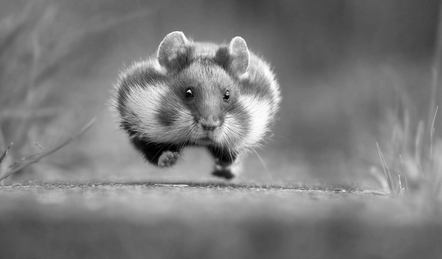

In [ ]:
#@title
from IPython.display import Image as Img
Img('figures/grey.png')

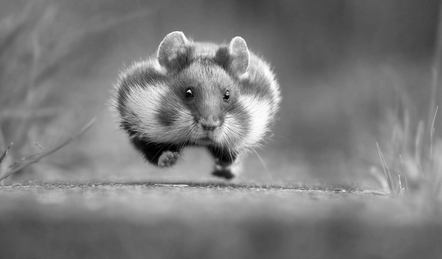

In [64]:
#code comes here
img_grey = img.convert("L")
img_grey

**Question**  Blur the image. Sample is below

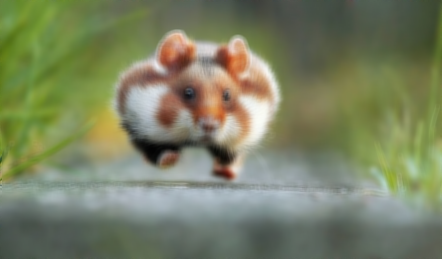

In [ ]:
#@title
from IPython.display import Image as Img
Img('figures/blur.png')

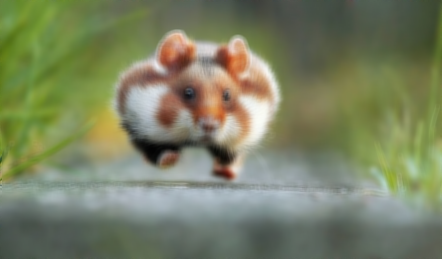

In [65]:
#code comes here
blur_img = img.filter(ImageFilter.BLUR)
blur_img

**Question** Find and display the edges in the image. Sample below;

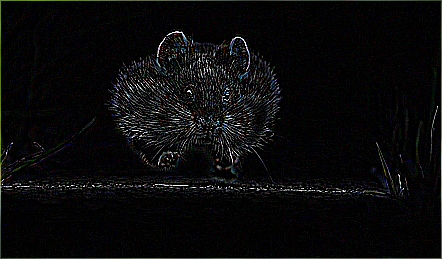

In [ ]:
#@title
from IPython.display import Image as Img
Img('figures/edge.png')

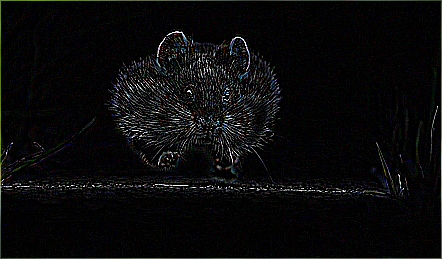

In [66]:
#code comes here
edges = img.filter(ImageFilter.FIND_EDGES)
edges

# Misc Problems

- Start this problem at the very end. In "figures/animals" folder, we have 6 folders ['wolf', 'fox', 'cheetah', 'tiger', 'lion', 'hyena'] including the corresponding animal pictures in it. We will carry out some tasks on this folder

- To do this, we will use Python *os* module. In particular *os.walk* command. Watch the tutorial [here](https://www.youtube.com/watch?v=NEeYDqNXBzM&t=194s) to see how it works. 

**Task-1**: Write a code to count the number of images in each folder and then plot folder names(animal classes) vs number of images in each class. Modify the following code to achieve this task. Your plot must look like as follows.

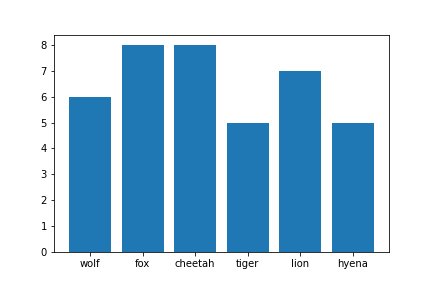

In [74]:
#@title
from IPython.display import Image as Img
Img('figures/animalbar.png')

{'cheetah': 8, 'tiger': 5, 'fox': 8, 'wolf': 6, 'hyena': 5, 'lion': 7}


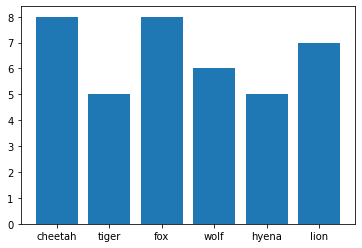

In [69]:
root_dir = "animals/"
class_counts = dict()
for (dirpath, dirnames, filenames) in os.walk(root_dir):
    #print([dirpath, dirnames, filenames])
    class_name = dirpath.split("/")[-1]
    if len(class_name)!=0:
        class_counts[class_name]=len(filenames)

print(class_counts)

#use ba plot to visualize
plt.bar(x=class_counts.keys(),height=class_counts.values())
plt.show()

**Task-2**: Write a routine to save all the image paths in a list. You will use os.walk for this task and random module to shuffle the list. For example, some elements from your list must look like

          ['figures/animals/cheetah/00000580_512resized.png',
          'figures/animals/lion/00000101_512resized.png',
          'figures/animals/lion/00000075_512resized.png',
          'figures/animals/cheetah/00000595_512resized.png',
          'figures/animals/cheetah/00000587_512resized.png'
          .........]


In [72]:
image_paths = []
root_dir = "animals/"
for (dirpath, dirnames, filenames) in os.walk(root_dir):
    for names in filenames:
        image_paths.append(os.path.join(dirpath,names))
    random.shuffle(image_paths)

#print the first 3 paths
print(image_paths[:3])

['animals/wolf/00000050_512resized.png', 'animals/hyena/00000498_512resized.png', 'animals/tiger/00000391_512resized.png']


**Task3** Based on task2, given a *random* number $n$, we would like to display $n^2$ images in a $n\times n$ grid. To do that,pick image paths from the list in task2  and display in a grid. For example, if n=3, display 3*3=9 random images taken from that list. Each image title must be the corresponding animal name. Replicate something like;


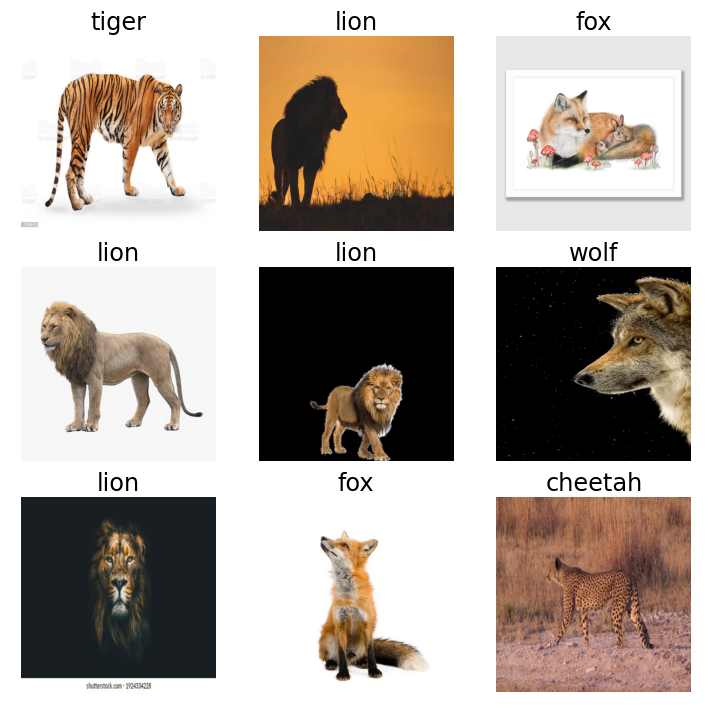

In [ ]:
#@title
from IPython.display import Image as Img
Img('figures/grid.png')

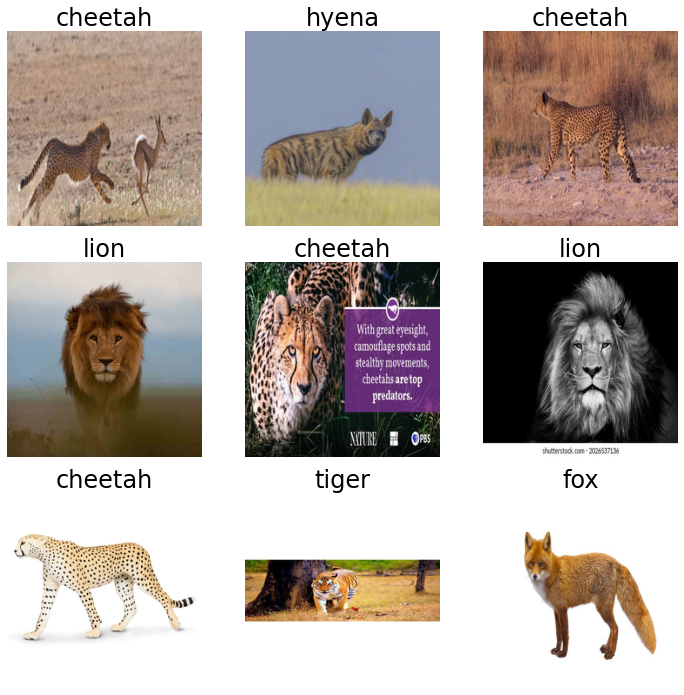

In [73]:
#code comes here
def ViewSamples(n,img_paths):
    plt.figure(figsize=(10, 10))
    img_lst = random.sample(img_paths,n*n)
    for i,img_path in enumerate(img_lst):
        img = Image.open(img_path).convert('RGB')
        label  = img_path.split('/')[-2]
        plt.subplot(n, n, i+1) 
        plt.title(label,fontdict={"fontsize":24})
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)

    
ViewSamples(3,image_paths)

# Collaboration Statement

Clearly indicate the contributions of each group member.


- Member1 Name:




- Member2 Name:



- Member3 Name: